<a href="https://colab.research.google.com/github/sndpwrites/Kaggle-competition/blob/main/Titanic%20-%20Machine%20Learning%20from%20Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"","key":""}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
import pandas as pd
import zipfile

with zipfile.ZipFile('titanic.zip') as z:
    # List all files in the archive
    print(z.namelist())
    # Assuming 'train.csv' is in the archive
    with z.open('train.csv') as f:
        df = pd.read_csv(f)

['gender_submission.csv', 'test.csv', 'train.csv']


In [20]:
df.head()
df.drop(columns=['Name','Ticket', 'Cabin', 'PassengerId'], inplace=True)

In [21]:
categorical_features = ['Sex', 'Embarked']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

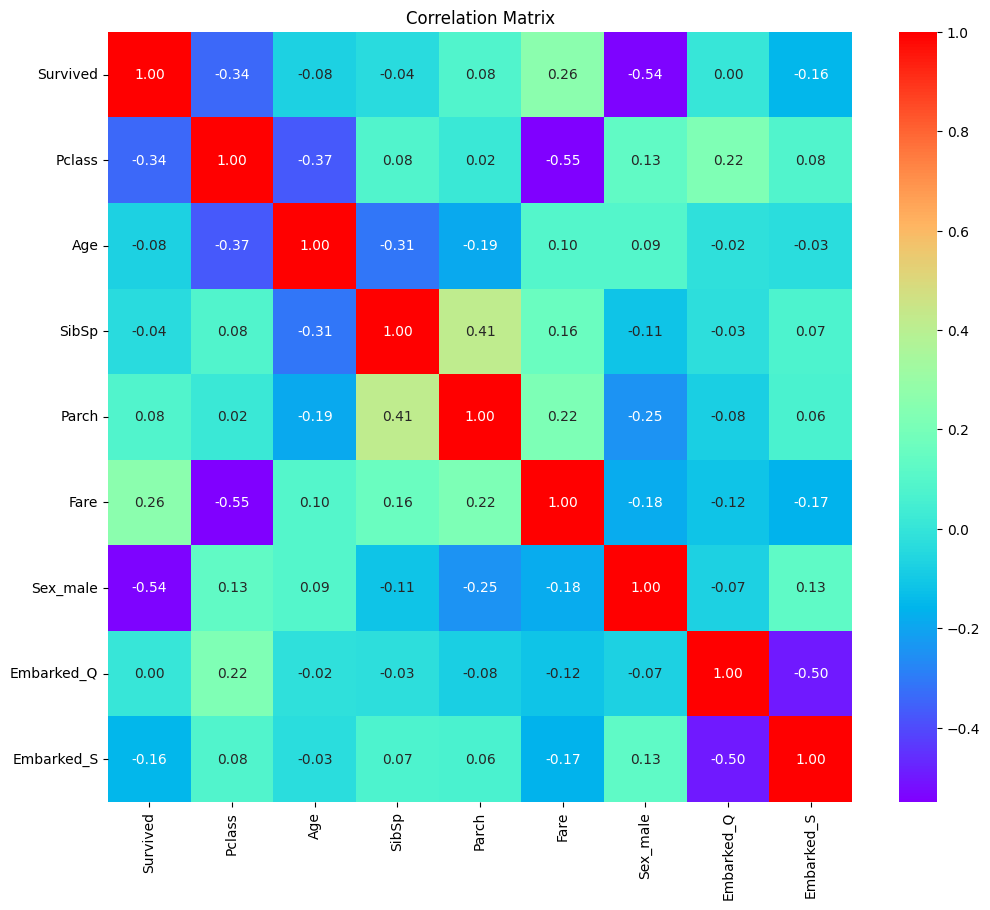

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [23]:
df.fillna(df.mode(), inplace=True)
df.fillna(df.mean(), inplace=True)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

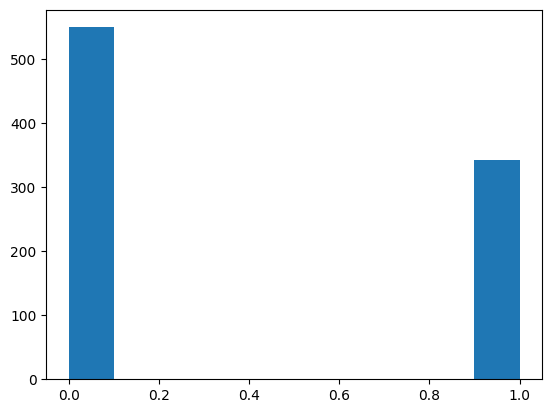

In [24]:
plt.hist(df['Survived'])

In [25]:
y = df['Survived']
X = df.drop(columns=['Survived'])

In [26]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400
50%,3.000000,29.699118,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
X.shape, y.shape

((891, 8), (891,))

In [31]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

In [32]:
lr.fit(X,y)

LogisticRegression(max_iter=1000)

In [43]:
with zipfile.ZipFile('titanic.zip') as z:
    # List all files in the archive
    print(z.namelist())
    # Assuming 'train.csv' is in the archive
    with z.open('test.csv') as f:
        df_test = pd.read_csv(f)

['gender_submission.csv', 'test.csv', 'train.csv']


In [39]:
categorical_features = ['Sex', 'Embarked']
df_test = pd.get_dummies(df_test, columns=categorical_features, drop_first=True)

In [40]:
df_test.drop(columns=['Name','Ticket', 'Cabin', 'PassengerId'], inplace=True)

In [41]:
df_test.fillna(df_test.mode(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)
y_pred = lr.predict(df_test)

In [44]:
output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
output.to_csv('submission.csv', index=False)

In [47]:
!kaggle competitions submit -c titanic -f submission.csv -m "Message"

100% 2.77k/2.77k [00:00<00:00, 14.8kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster